<a href="https://colab.research.google.com/github/Samsonite27/Samsonite27.github.io/blob/main/Miscellaneous/Finite_Difference_Method_For_Heat_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

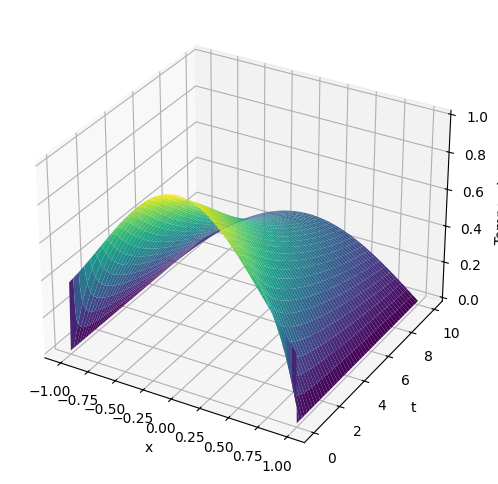

In [84]:
import numpy as np
import matplotlib.pyplot as plt

def heat_equation_simulation(initial_value_function, auxiliary_function,
                             diffusion_constant=0.05, space_interval=(-1, 1),
                             time_interval=(0, 10), del_t=0.001,
                             del_x=0.01, boundary_values=(0, 0)):
  """
  Solve the heat equation with Dirichlet boundary conditions.

  Parameters:
      - initial_value_function: u(x, 0) = g(x)
      - auxiliary_function: source function, f(x,t)
      - diffusion_constant: diffusion constant
      - space_interval: interval in 1D space (a, b)
      - time_interval: time interval (t_0, t_1)
      - del_t: time step size
      - del_x: space step size
      - boundary_values: (u_a, u_b) where u_i = u(i, t) for all t in interval

  Returns:
      - x_vals: discrete points in space
      - t_vals: discrete points in time
      - time_snapshots: list of vectors u(x, t_i) where t_i is fixed
  """
  # Define an inline function that takes the step sizes and diffusion constant and outputs if system will be stable
  # This is the Courant-Friedrichs-Lewy (CFL) condition and numerical stability is satisfied if and only if this holds
  CFL = lambda del_t, del_x, k: (2 * del_t * k / del_x**2 <= 1)

  # Runs the code if satisfied, if not outputs an error

  if CFL(del_t, del_x, diffusion_constant):
    # Unpacking
    a, b = space_interval
    t_0, t_1 = time_interval
    u_a, u_b = boundary_values
    # Manipulation for linspace
    num_t_intervals = int((t_1 - t_0) / del_t)
    num_x_intervals = int((b - a) / del_x)
    # Discrete points
    x_vals = np.linspace(a, b, num_x_intervals + 1)
    t_vals = np.linspace(t_0, t_1, num_t_intervals + 1)

    initial_vector = np.array([initial_value_function(val) for val in x_vals])

    # Direlecht conditions
    initial_vector[0] = u_a
    initial_vector[-1] = u_b
    # Add inital state
    time_snapshots = [initial_vector]
    # Euler time step, using an approximation, can implement with with tridiagonal matricies, sure more efficient, orignially did, found this more readiavle
    for i in range(1, len(t_vals)):
        u_new = np.copy(time_snapshots[-1])

        # Apply Dirichlet boundary conditions
        u_new[0] = u_a  # Temperature at x = a
        u_new[-1] = u_b  # Temperature at x = b

        # Update with finite differences
        for j in range(1, len(x_vals) - 1):
            u_new[j] = time_snapshots[-1][j] + (diffusion_constant * del_t / del_x ** 2) * (
                time_snapshots[-1][j - 1] - 2 * time_snapshots[-1][j] + time_snapshots[-1][j + 1]) + del_t * auxiliary_function(x_vals[j], t_vals[i])

        # Add to the list
        time_snapshots.append(u_new)

    return x_vals, t_vals, time_snapshots

  else:
        lhs = 2 * diffusion_constant * del_t
        rhs = del_x**2
        return f"WARNING: Numerical instability, please re-enter, LHS: {lhs}, RHS: {rhs}"

# Homogenous case
initial_value = lambda x: np.exp(-(x**2))
auxiliary = lambda x, t: 0

# Dirichlet boundary conditions
boundary_values = (0, 0)

# Try-except just to catch the unpacking error
try:
  x, t, snapshots = heat_equation_simulation(initial_value, auxiliary, boundary_values=boundary_values)


  X, T = np.meshgrid(x, t)
  Z = np.array(snapshots)

  fig = plt.figure(figsize=(10, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(X, T, Z, cmap='viridis')

  ax.set_xlabel('x')
  ax.set_ylabel('t')
  ax.set_zlabel('Temperature')

  plt.show()

except:
  print(heat_equation_simulation(initial_value, auxiliary, boundary_values=boundary_values))


